In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

## 전체 데이터 불러오기

In [112]:
pivot_df = pd.read_csv("/home/piai/test/Big_Data_분석_기초/제지공장 프로젝트/data/B2_제지/pivotdata.csv",index_col="Unnamed: 0")
pivot_df.index = pd.to_datetime(pivot_df.index)

In [113]:
for i in pivot_df.columns:
    if pivot_df[i].nunique()==1:
        print(i)

TAG_003
TAG_010
TAG_051
TAG_061
TAG_081
TAG_082
TAG_083
TAG_093
TAG_125
TAG_126


In [114]:
df_stopped = pd.read_csv("/home/piai/test/Big_Data_분석_기초/제지공장 프로젝트/data/B2_제지/03_중지리스트.csv")

In [115]:
df_stopped["start_date"] = pd.to_datetime(df_stopped["start_date"])
df_stopped["end_date"] = pd.to_datetime(df_stopped["end_date"])

In [116]:
label_1 = df_stopped[((df_stopped["cause"]=="불량중지")|(df_stopped["cause"]=="중지"))]

In [117]:
label_2 = df_stopped[~((df_stopped["cause"]=="불량중지")|(df_stopped["cause"]=="중지"))]

In [118]:
pivot_df["result"]=0

In [119]:
for start,end in zip(label_1["start_date"],label_1["end_date"]):
    pivot_df.loc[((pivot_df.index>=start)&(pivot_df.index<=end)),"result"]=1

In [120]:
for start,end in zip(label_2["start_date"],label_2["end_date"]):
    pivot_df.loc[((pivot_df.index>=start)&(pivot_df.index<=end)),"result"]=2

In [121]:
pivot_df["result"].value_counts()

0    479734
2     34213
1      7409
Name: result, dtype: int64

In [122]:
pivot_df.to_csv("./all.csv")

In [48]:
# path = '/home/piai/포스코AI아카데미/BigData/1. 데이터셋/Project/'
df_info = pd.read_csv("/home/piai/test/Big_Data_분석_기초/제지공장 프로젝트/data/B2_제지/tag_list.csv", encoding = 'euc-kr' )
# df_info
# 정상 범위 값 dataframe

## 태그들을 프로세스 별로 나눠 딕셔너리화해줌

In [109]:
process_dict = {1:["TAG_{:003d}".format(i) for i in range(1,57)],2:["TAG_{:003d}".format(i) for i in range(57,72)],3:["TAG_{:003d}".format(i) for i in range(72,87)],4:["TAG_{:003d}".format(i) for i in range(87,196)]}

## 실행단. 아래 입력만 바꾸면 그 밑에서 플롯해줌.

In [110]:
from_val = df_end   # 보고싶은 시작 날짜 
to_val = df_start     # 마지막 날짜
event_val = df_stopped["start_date"]  # 이벤트 날짜
process_num = 3
# df_result = pivot_df.loc[from_val:to_val]

In [ ]:
pivot_df.loc[((pivot_df.index>=start)&(pivot_df.index<=end))][["result"]]=pivot_df.loc[((pivot_df.index>=start)&(pivot_df.index<=end))][["result"]].replace(0,1,inplace=True)
pivot_df.loc[((pivot_df.index>=start)&(pivot_df.index<=end))][["result"]]

In [ ]:
df_stoped_30 = df_stoped-datetime.timedelta(minutes=240)

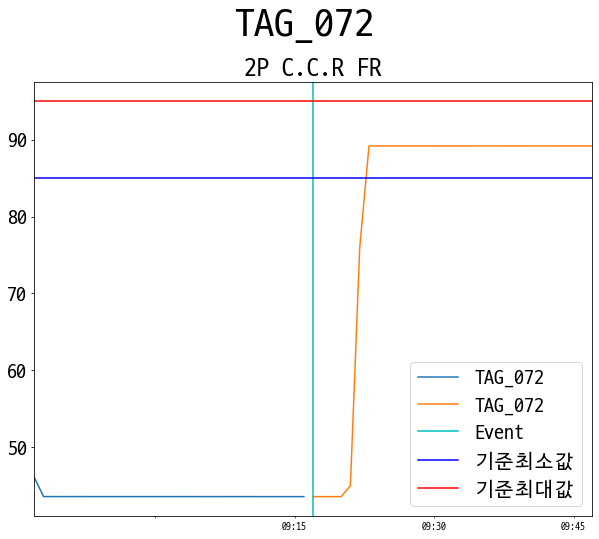

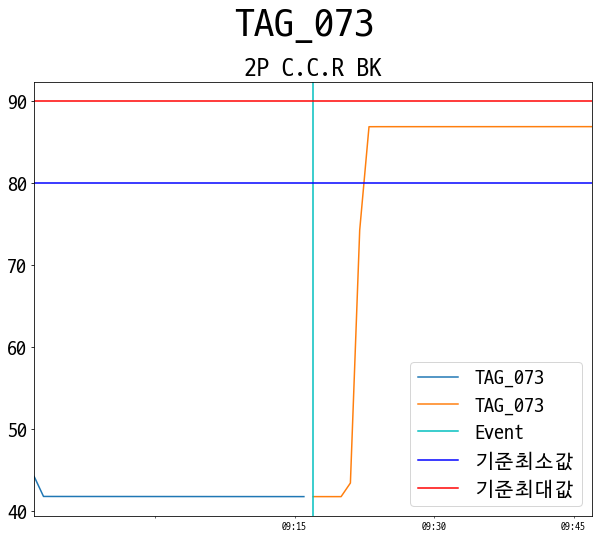

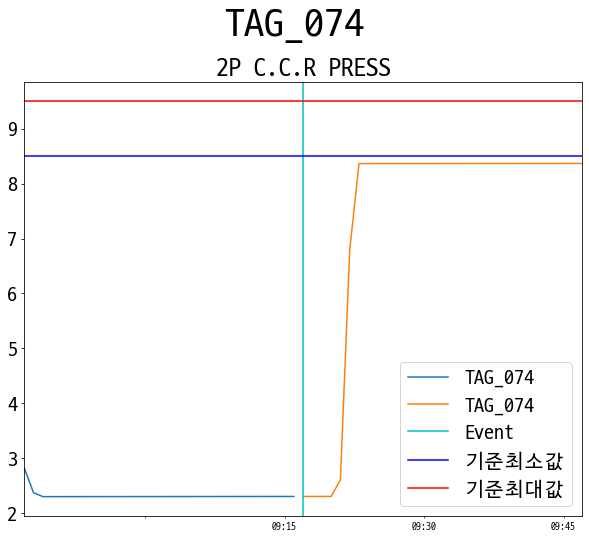

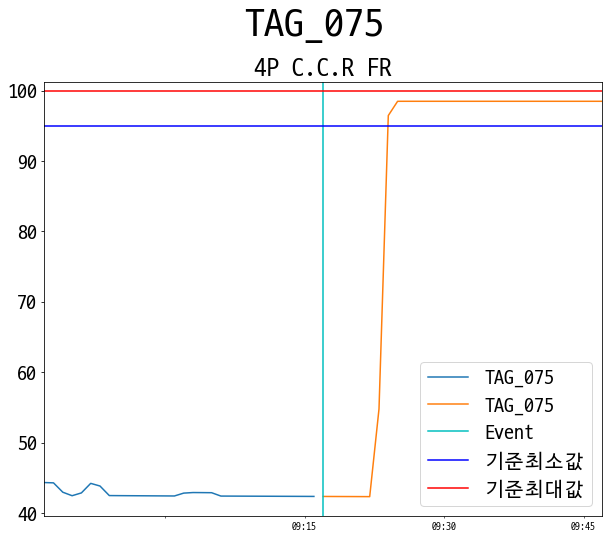

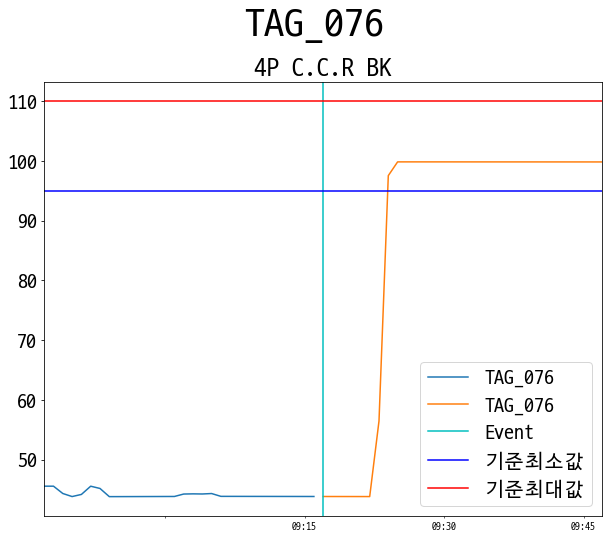

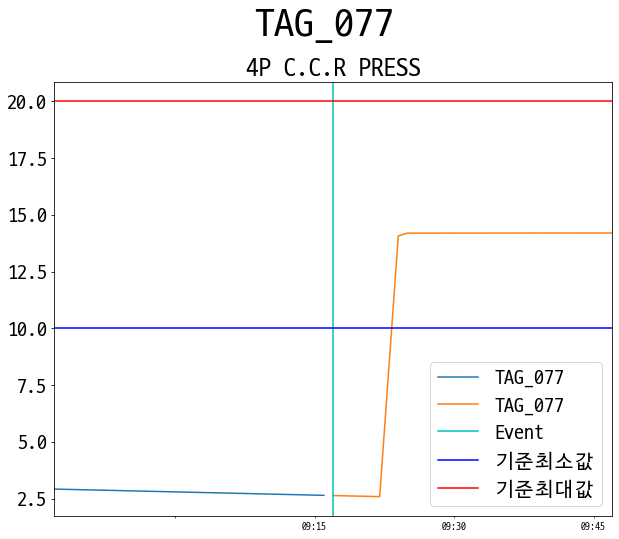

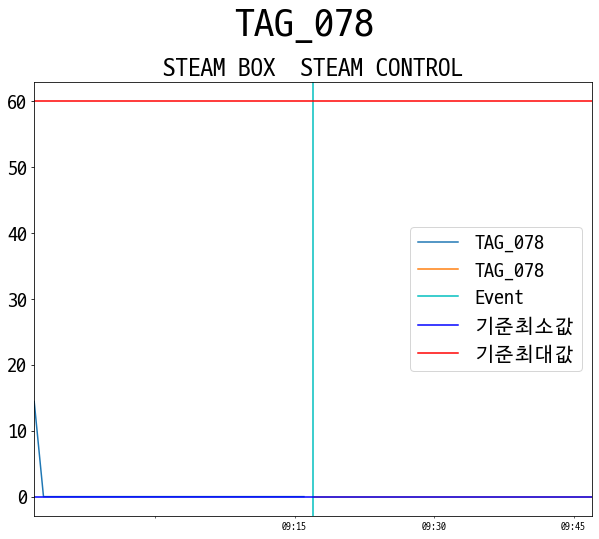

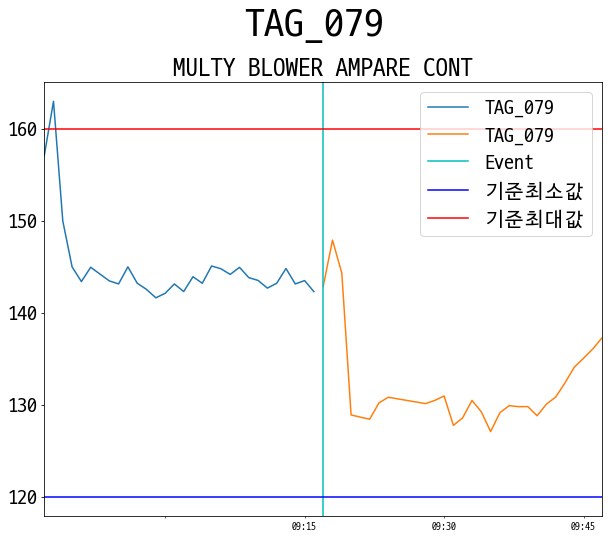

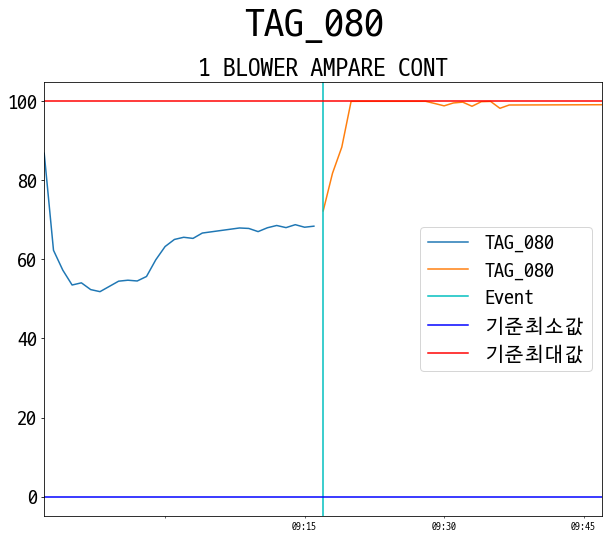

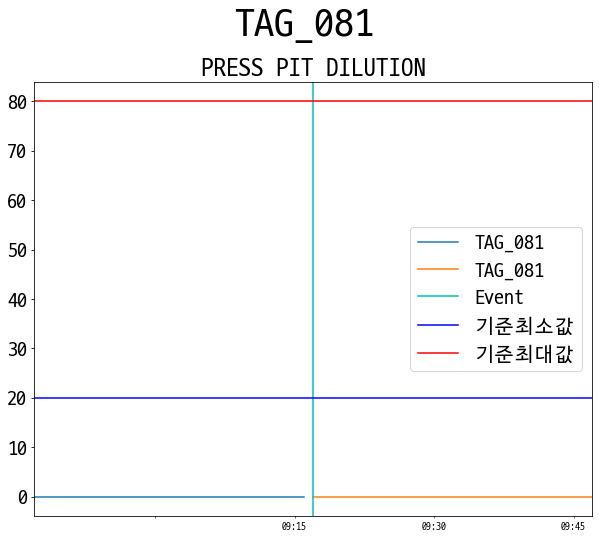

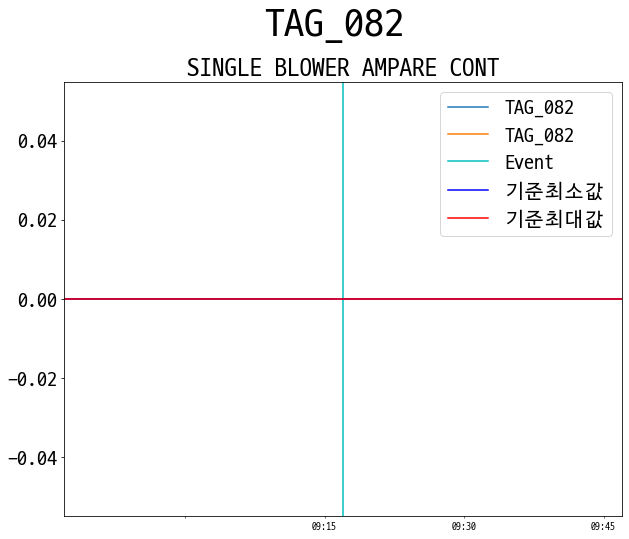

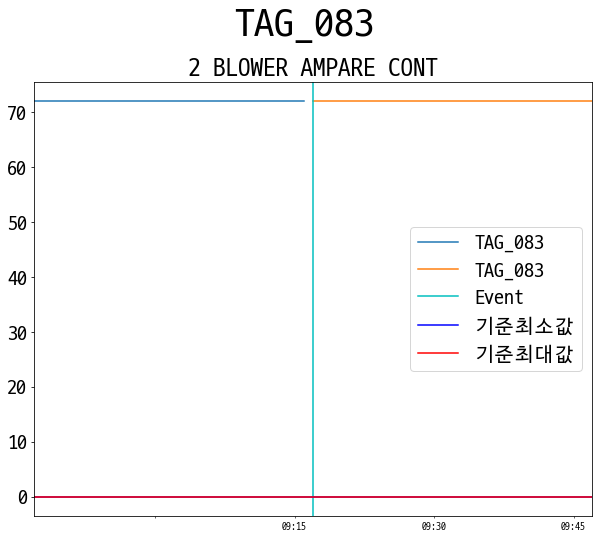

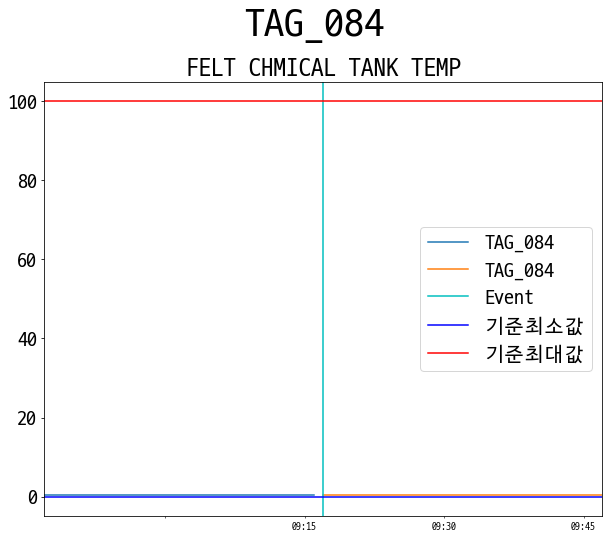

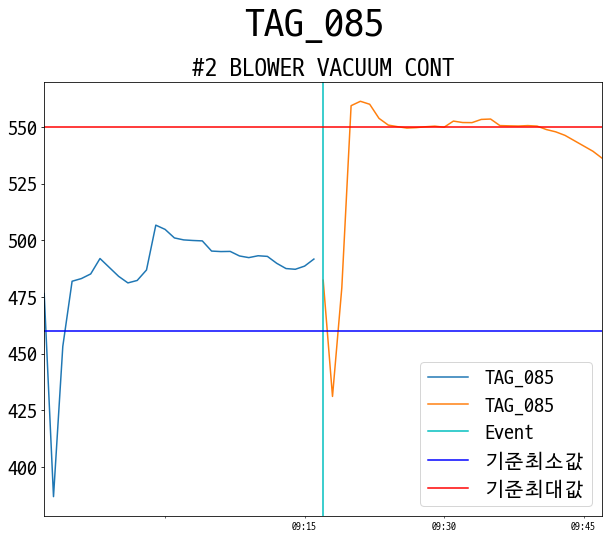

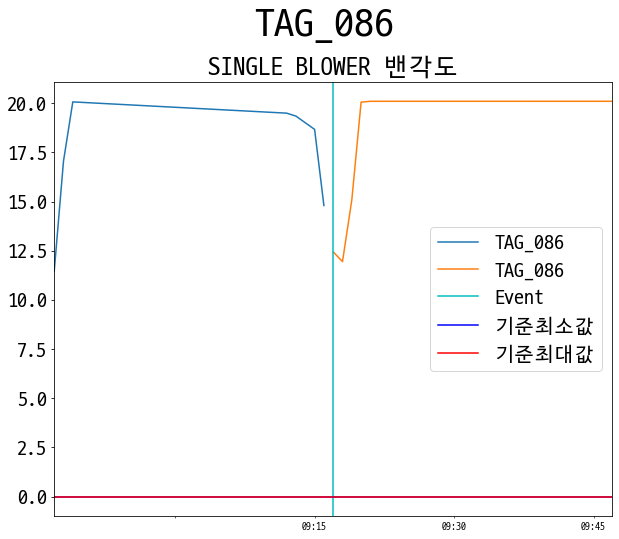

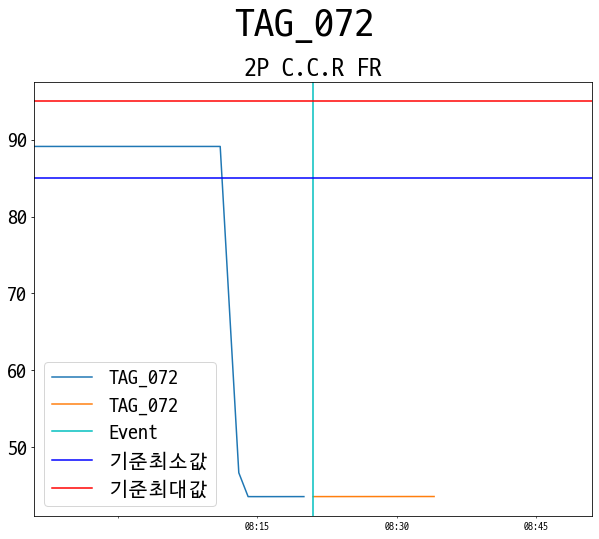

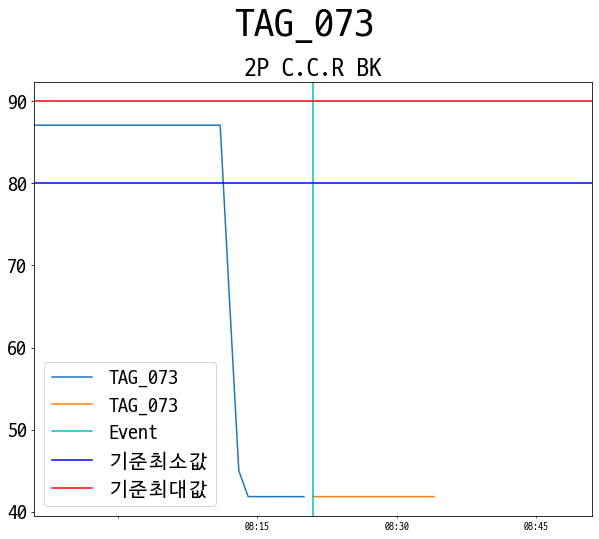

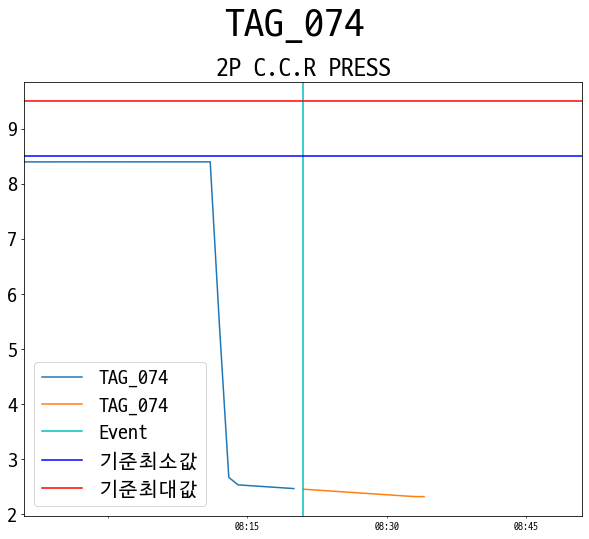

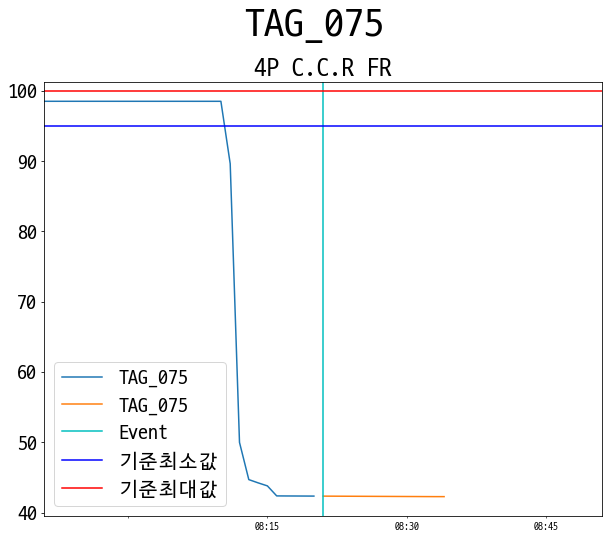

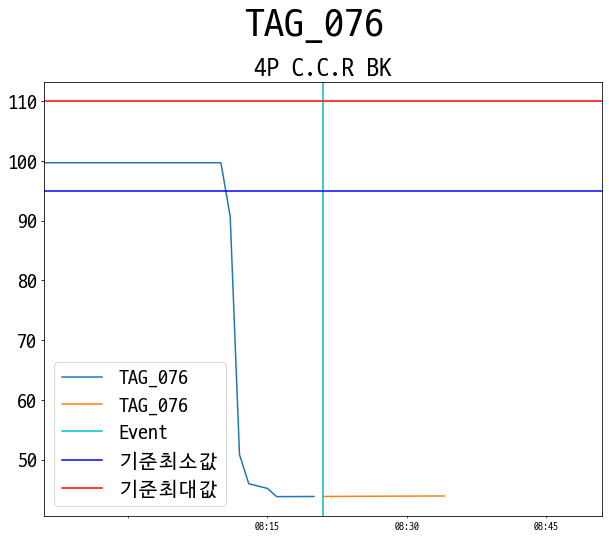

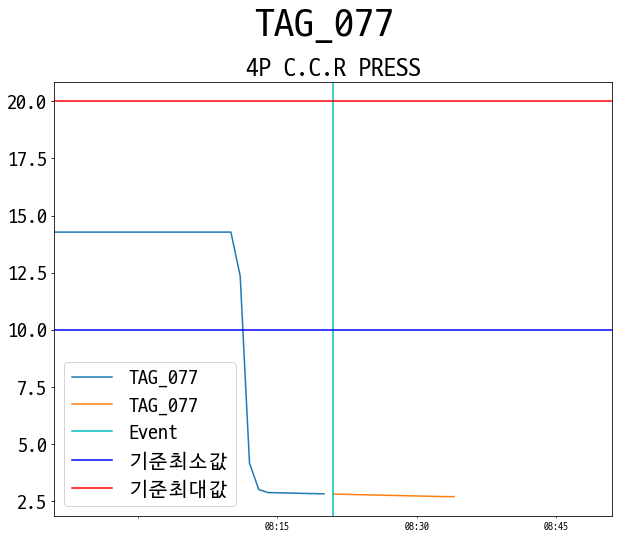

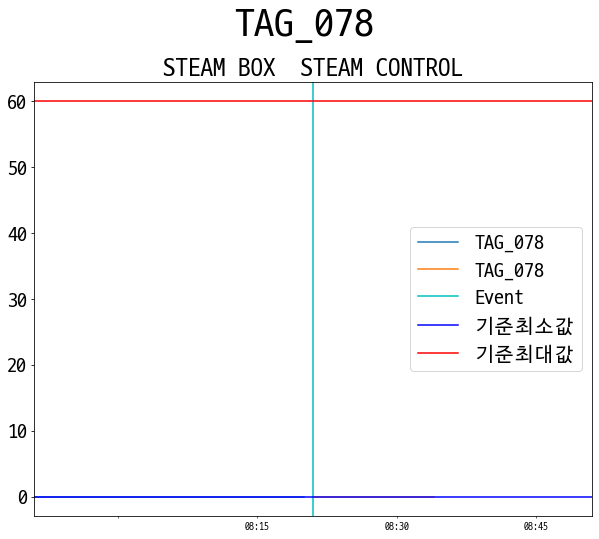

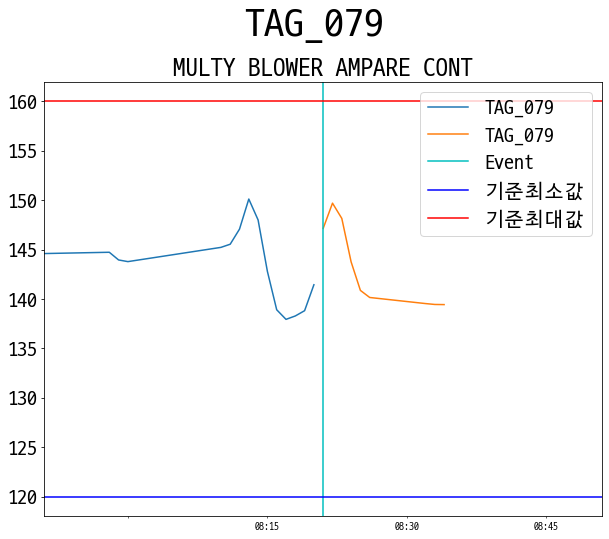

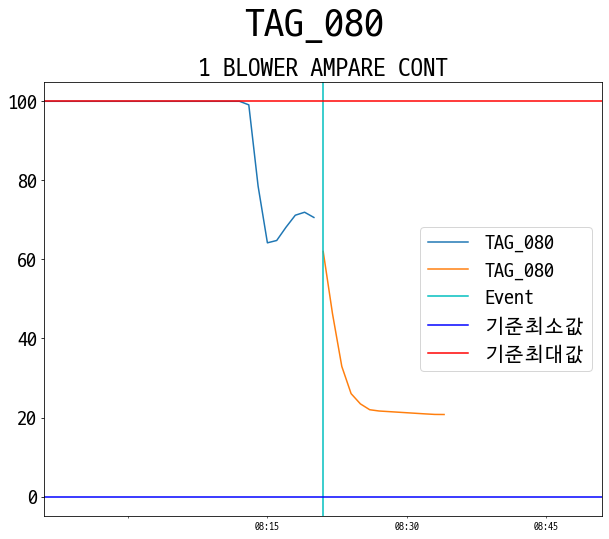

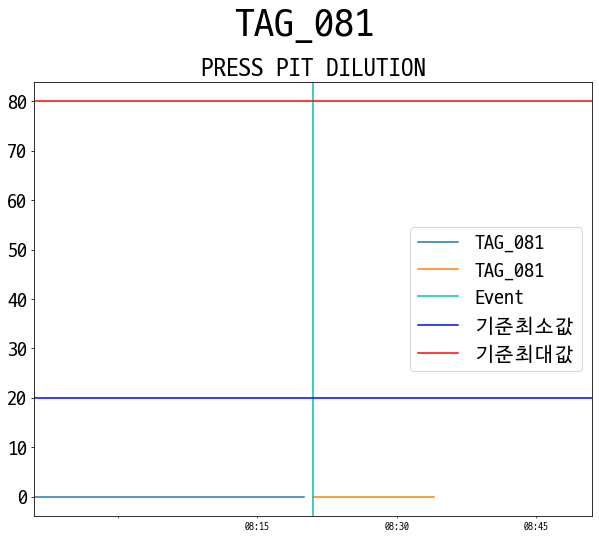

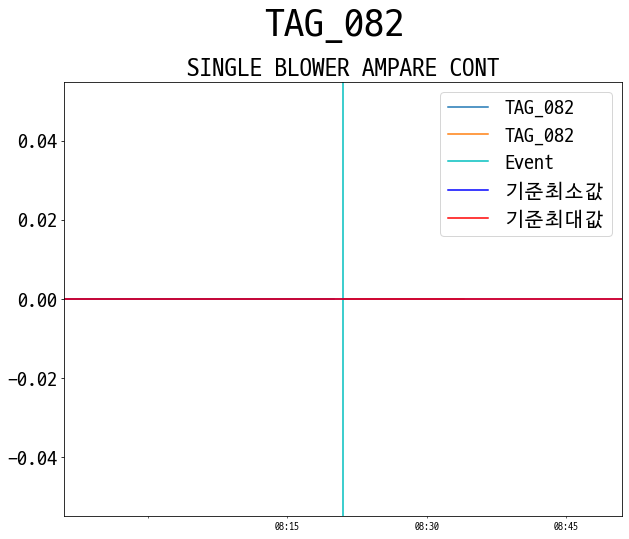

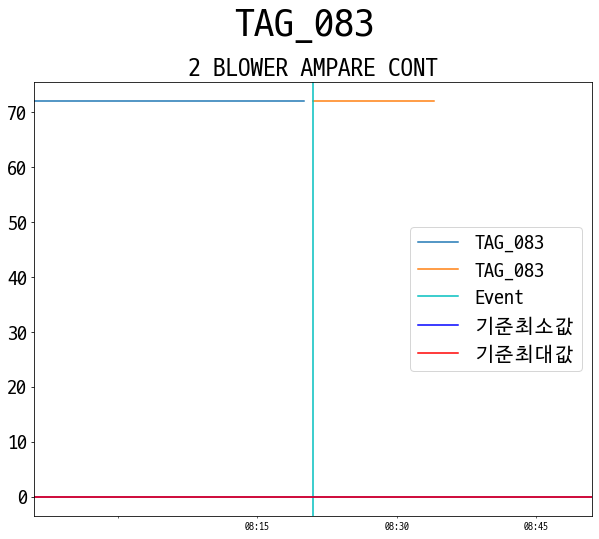

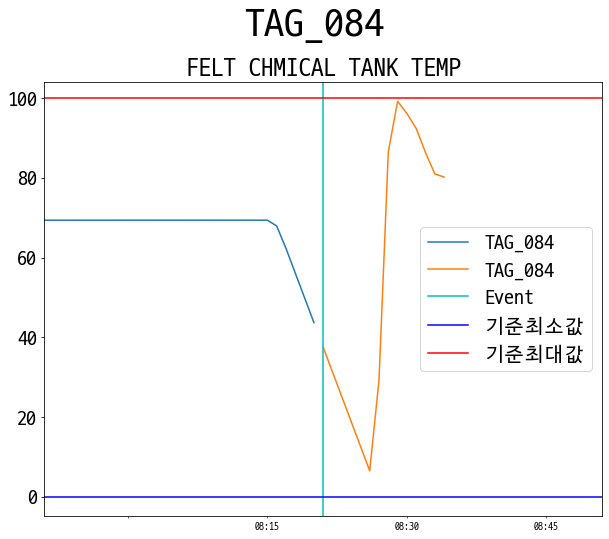

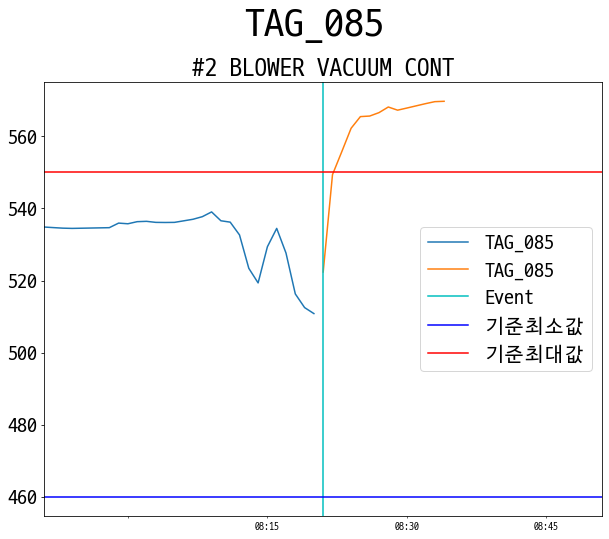

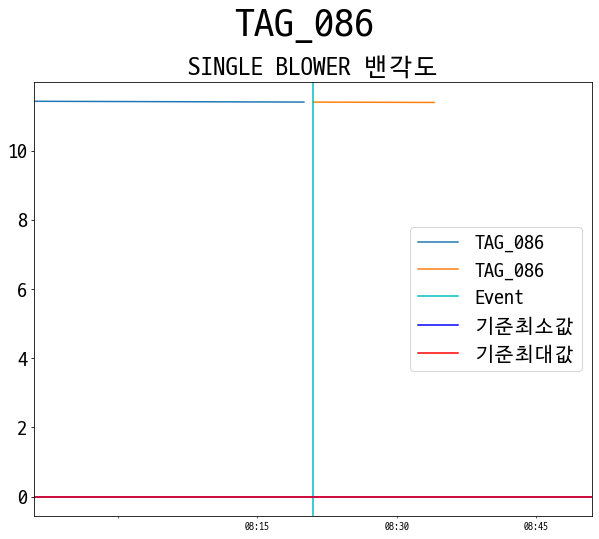

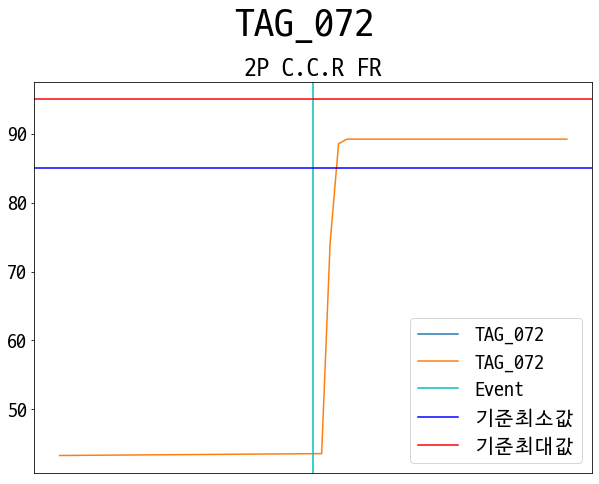

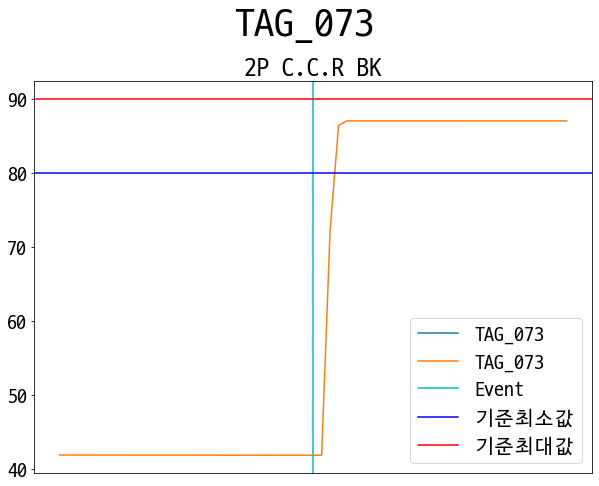

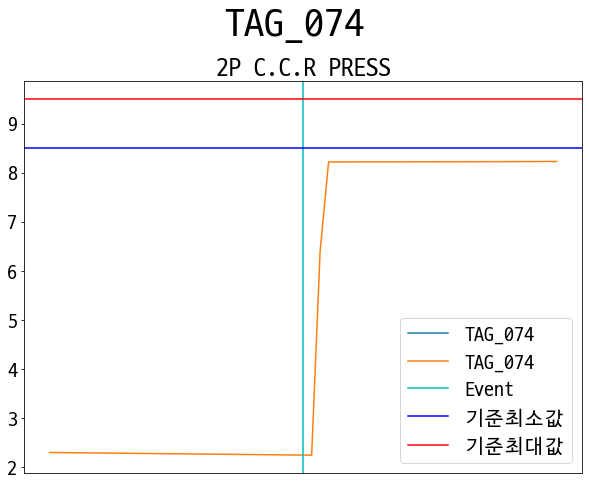

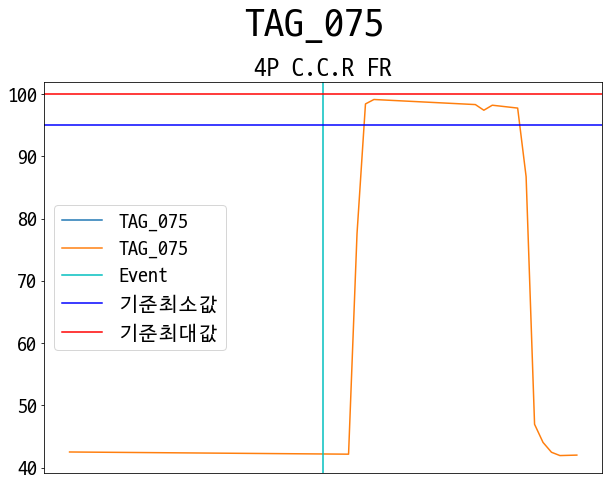

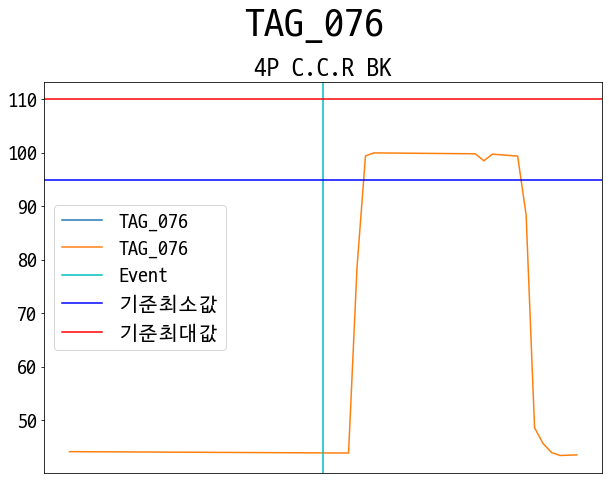

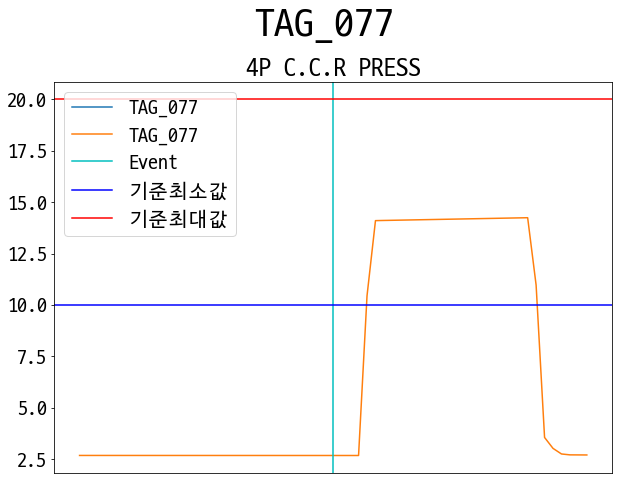

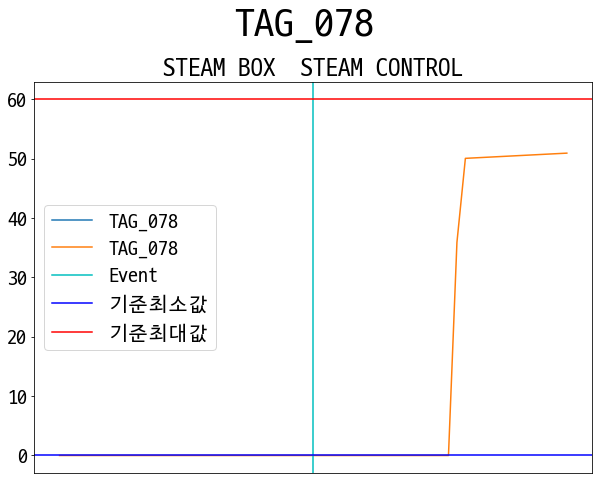

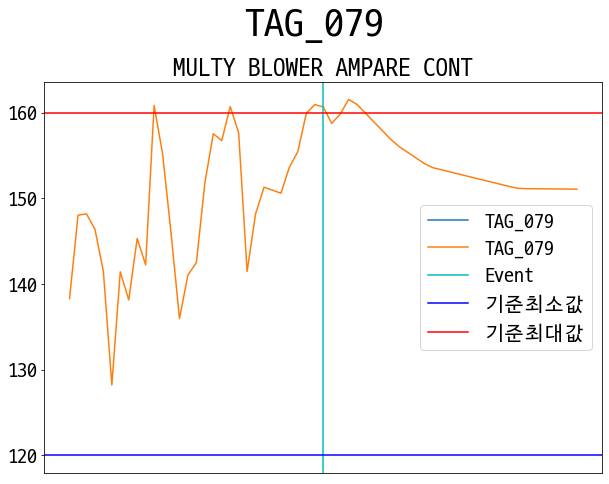

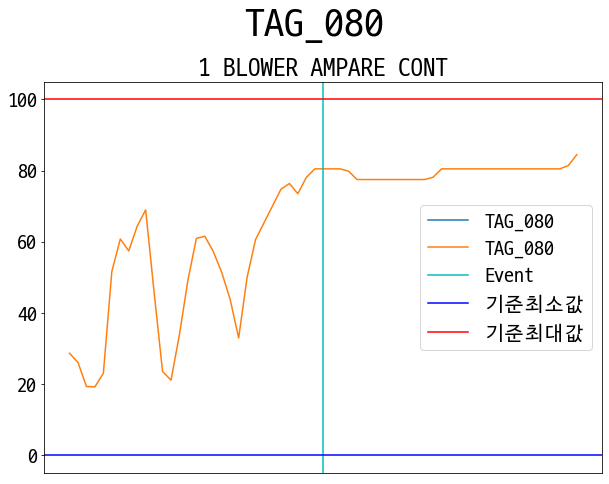

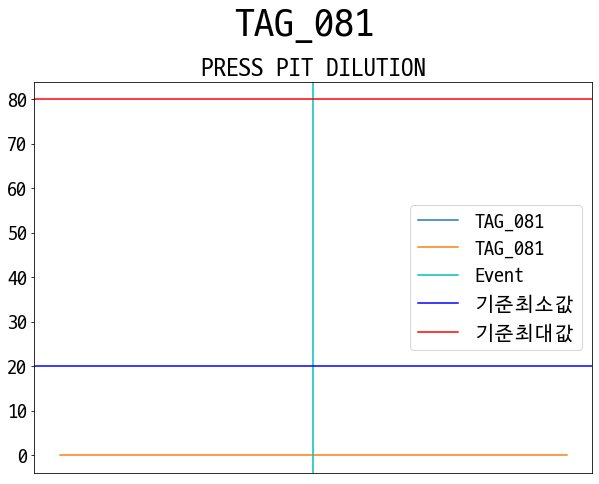

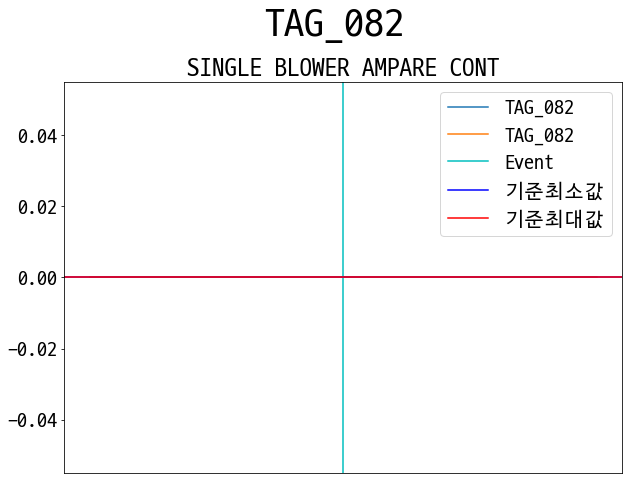

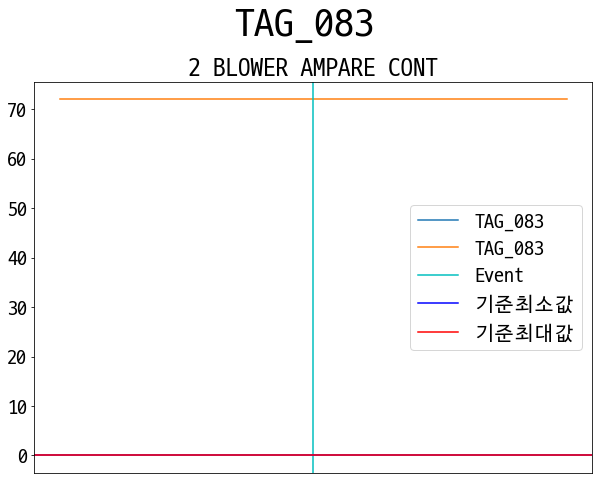

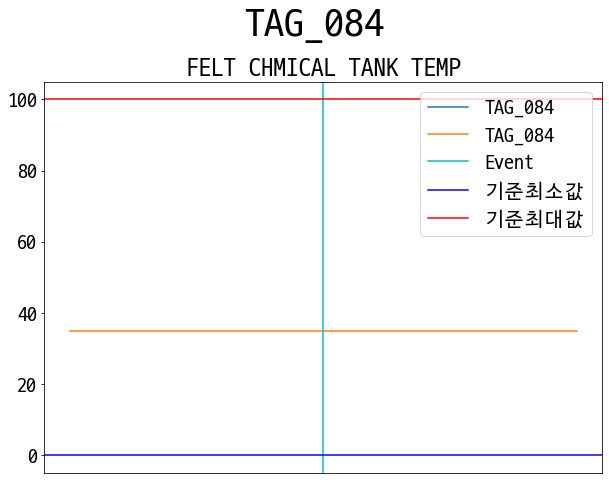

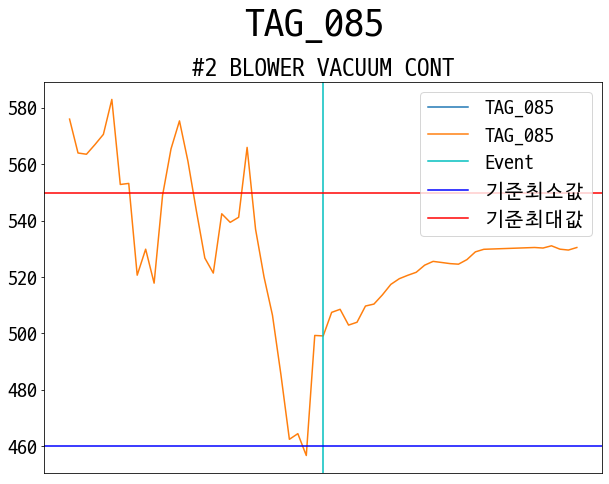

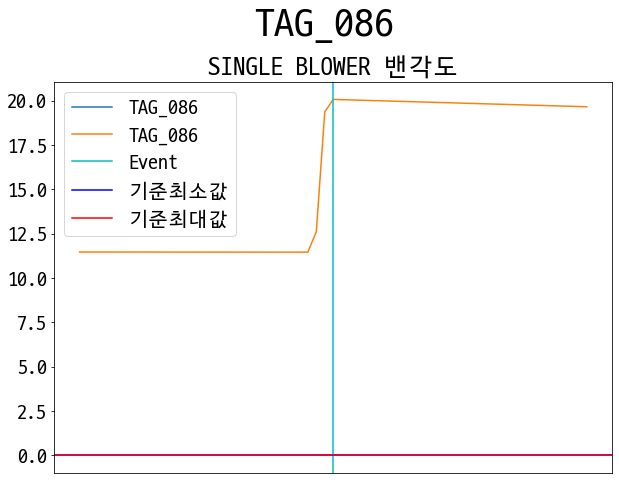

In [111]:
for i in range(len(df_stopped[:3])):
    for col in process_dict[process_num]:
        df_result = pivot_df[[col,"result"]].loc[str(from_val[i]):str(to_val[i])]
        plt.figure(figsize=(10,8))
        plt.suptitle("%s"%col,fontsize=40,y=1.01)
        df_result.loc[(df_result["result"]==0),col].plot()
        df_result.loc[~(df_result["result"]==0),col].plot()
        plt.title("%s"%df_info[df_info['id'] == col]['태그설명'].values[0],fontsize=25)
        plt.axvline(x =event_val[i], color = 'c',label="Event")
        minval, maxval = df_info[df_info['id'] == col]['기준최소값'].values[0], df_info[df_info['id'] == col]['기준최대값'].values[0]
#         plt.xlabel("")
        plt.axhline(y = minval , color = 'b',label="기준최소값")
        plt.axhline(y = maxval , color = 'r',label='기준최대값')
        plt.yticks(fontsize=20)
        plt.xticks([],fontsize=20)
        plt.legend(fontsize=20)
        plt.show()
#         # 디렉토리 만들어주고 png파일 저장.
#         folder_name = "Figure/%d/%s"%(process_num,col)
#         cmd = "mkdir -p %s"%folder_name
#         os.system(cmd)
#         plt.savefig("./{}/{}_{}.png".format(folder_name,i,col))
#         plt.close()

In [184]:
# df_stoped=df_stop.loc[(df_stop["cause"]=="중지")|(df_stop["cause"]=="불량중지")]["start_date"]
df_stoped=df_stop.loc[((df_stop["facility"]=="3번 PRESS")|(df_stop["facility"]=="4번 PRESS"))&(df_stop["cause"]=="불량중지")]["start_date"]

In [ ]:
df_result.index
pivot_df.columns

In [ ]:
print(min(pivot_df.index),max(pivot_df.index))

In [ ]:
525600-len(pivot_df)

In [ ]:
for col in pivot_df.columns[:2]:
    for i in range(len(pivot_df[pivot_df[col].isnull()==True].index)):
        print(pivot_df[pivot_df[col].isnull()==True])

In [ ]:
a=0
for i in range(1,len(pivot_df)):
    if pivot_df.index[i-1]!=pivot_df.index[i]-datetime.timedelta(minutes=1):
        print('누락된 시각\nfrom\t: ',pivot_df.index[i-1],'\nto\t: ',pivot_df.index[i])
        print(pivot_df.index[i]-pivot_df.index[i-1])
        a=sum(a,pivot_df.index[i]-pivot_df.index[i-1])


In [ ]:
df_stop_list = pd.read_csv("/home/piai/test/Big_Data_분석_기초/제지공장 프로젝트/data/B2_제지/03_중지리스트.csv")
df_indexes =  {time : False for time in pivot_df.index}
problems = df_stop_list[df_stop_list['cause'].isin(['중지', '불량중지'])]
for start, end in zip(pd.to_datetime(problems['start_date']), pd.to_datetime(problems['end_date'])):
    basetime = start
    for time in range((end - start).seconds // 60):
        df_indexes[ basetime + datetime.timedelta(minutes = time)] = True
        
pivot_df['result'] = [1 if val == True else 0 for key, val in df_indexes.items()]

In [ ]:
pivot_df.to_csv("./pivot_df_y.csv")